<a href="https://colab.research.google.com/github/asthajain99/MachineLearning/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class MyLinearRegression:
    def __init__(self, weight=0, bias=0.0, learning_rate=0.05,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, xfeature):
        predicted_set = []
        for i in range(len(xfeature)):
            predicted_value = self.weight * xfeature[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, xfeature, yfeature):
        count = len(xfeature)
        total_error = 0.0
        for i in range(count):
            total_error += (yfeature[i] - (self.weight * xfeature[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, xfeature, yfeature):
        weight_deriv = 0
        bias_deriv = 0
        count = len(xfeature)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * xfeature[i] * (yfeature[i] -
                                                (self.weight * xfeature[i] +
                                                 self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (yfeature[i] - (self.weight * xfeature[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, xfeature, yfeature):
        for i in range(self.iterations):
            self.update_weights(xfeature, yfeature)
            # Calculating cost
            self.cost = self.cost_function(xfeature, yfeature)
            self.cost_trend.append(self.cost)
            #if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".
            format(i, self.weight, self.bias, self.cost))

# New Section

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, 1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [34.405]	 Bias: [5.3625]	 Cost: 10817.894968296878
Iteration: 1	 Weight: [-51.47308813]	 Bias: [-7.9598875]	 Cost: 67303.87750325626
Iteration: 2	 Weight: [162.85344125]	 Bias: [25.35065524]	 Cost: 419160.56145935104
Iteration: 3	 Weight: [-372.07532114]	 Bias: [-57.72710055]	 Cost: 2610910.0134271975
Iteration: 4	 Weight: [962.99936137]	 Bias: [149.67784141]	 Cost: 16263530.101477336
Iteration: 5	 Weight: [-2369.11014476]	 Bias: [-367.90960585]	 Cost: 101307025.802528
Iteration: 6	 Weight: [5947.21306777]	 Bias: [923.94945609]	 Cost: 631051215.0771861
Iteration: 7	 Weight: [-14808.80728206]	 Bias: [-2300.23788276]	 Cost: 3930879188.4065742
Iteration: 8	 Weight: [36994.39016113]	 Bias: [5746.7942468]	 Cost: 24485827924.020172
Iteration: 9	 Weight: [-92296.86251538]	 Bias: [-14337.06348788]	 Cost: 152524598713.99802
Iteration: 10	 Weight: [230390.29499417]	 Bias: [35788.60033777]	 Cost: 950090529734.9275
Iteration: 11	 Weight: [-574977.45500724]	 Bias: [-89315.7778

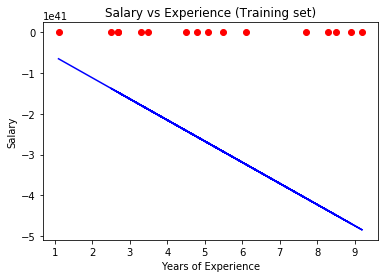

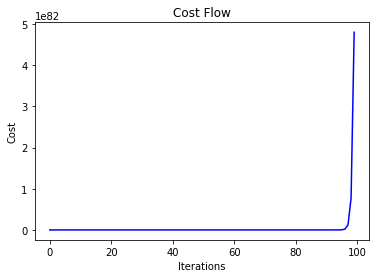

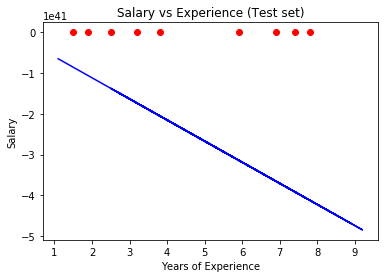

In [47]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.plot(regressor.cost_trend, color='blue')
plt.title('Cost Flow')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [0]:
1. lr=0.001, iterations=100, weight=9.83015648, bias=1.56253685, cost=15.648231390900044
2. lr=0.002, iterations=100, weight=9.83195616, bias=1.59710553, cost=15.641615670534955
3. lr=0.005, iterations=100, weight=9.81742789, bias=1.69065084, cost=15.626683596562536
4. lr=0.02, iterations=100, weight=9.76420704, bias=2.03326355, cost=15.585812861846486
5. lr=0.05, iterations=100, weight=-5.18039108e+40, bias=-8.04712731e+39, cost=4.803952727146199e+82

CONCLUSION:
If the learning rate is too small, then the machine model doesn't converge. Similarly if the learning rate is too high, then also machine model doesn't converge.